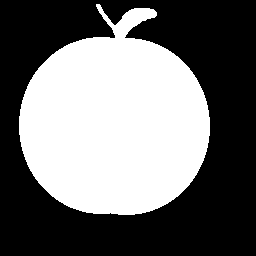

In [3]:
import numpy as np
from PIL import Image

img= Image.open(r"C:\Users\Jasser\Downloads\apple-1.gif")
img

In [8]:
matrice=np.array(img)
matrice

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [34]:
 def momentgeo( image, p, q):
        moment = 0
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                moment += (i**p)*(j**q)*image[i][j]
        return moment
 a=b=matrice.shape[0]
a,b

(256, 256)

In [36]:
m0=momentgeo(matrice,a,b)   
m0

1605567501824312518162618796803985003157880566252986620774260809988378117619633395457683850244088826258938038495246798050113894763649047502943400185984807937622214560351294721558553204612222861362052370106123613648760272627727920406923322684706946219531641270854657984854013590843786522832782471191371166978236251993835565743067213495800373411168146678310205315675817246403122262175933872464109426919099999172664021635885074646237865167730903855777781691400784238088021019822057023455020839279600913263349141001785397390939937869360532556237842557207478306383877588012417096671381849277224047241208060935804435060301217663632784099728141405215183311477128058577830955366862333268768482381273151116649549318767956696917069544496730540610131494012652148444641402970011637426076846341077358085450986627927736939049445573492977219974614698717454182568808015625883295149615395029694115756560545125723557733666731667400028948473456991441395768137781374636434452314566289884622711869227950650495394333198276

In [12]:
inv=matrice.transpose()
inv

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

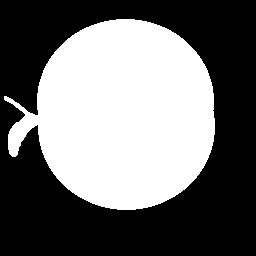

In [14]:
pht=Image.fromarray(inv)
pht

In [37]:
 m1=momentgeo(inv,a,b)   
 m1

1605567501824312518162618796803985003157880566252986620774260809988378117619633395457683850244088826258938038495246798050113894763649047502943400185984807937622214560351294721558553204612222861362052370106123613648760272627727920406923322684706946219531641270854657984854013590843786522832782471191371166978236251993835565743067213495800373411168146678310205315675817246403122262175933872464109426919099999172664021635885074646237865167730903855777781691400784238088021019822057023455020839279600913263349141001785397390939937869360532556237842557207478306383877588012417096671381849277224047241208060935804435060301217663632784099728141405215183311477128058577830955366862333268768482381273151116649549318767956696917069544496730540610131494012652148444641402970011637426076846341077358085450986627927736939049445573492977219974614698717454182568808015625883295149615395029694115756560545125723557733666731667400028948473456991441395768137781374636434452314566289884622711869227950650495394333198276

In [38]:
# ona inverser l'image et le moment geometriques reste le meme m0=m1
m1==m0

True

In [64]:
 def momentcent( matrice):
        """
        fonction qui calcul le moment centrees d'une matrice python

        :param matrice: matrice a calculer
        :return: moment centrees
        """
        moment = []
        for i in range(len(matrice)):
            moment.append(0)
            for j in range(len(matrice[0])):
                moment[i] += matrice[i][j]
        return moment
j1=momentcent( matrice)
j2=momentcent( inv)
j1==j2

False

In [54]:
#les moments centrees  d'une image et son inverse ne sont pas egaux

from numpy import mgrid, sum

def moments2e(image):
  """
  This function calculates the raw, centered and normalized moments
  for any image passed as a numpy array.
  Further reading:
  https://en.wikipedia.org/wiki/Image_moment
  https://en.wikipedia.org/wiki/Central_moment
  https://en.wikipedia.org/wiki/Moment_(mathematics)
  https://en.wikipedia.org/wiki/Standardized_moment
  http://opencv.willowgarage.com/documentation/cpp/structural_analysis_and_shape_descriptors.html#cv-moments
  
  compare with:
  import cv2
  cv2.moments(image)
  """
  assert len(image.shape) == 2 # only for grayscale images        
  y,x = mgrid[:image.shape[0],:image.shape[1]]
  moments = {}
  moments['mean_x'] = sum(x*image)/sum(image)
  moments['mean_y'] = sum(y*image)/sum(image)
          
  # raw or spatial moments
  moments['m00'] = sum(image)
  moments['m01'] = sum(y*image)
  moments['m10'] = sum(x*image)
  moments['m11'] = sum(y*x*image)
  moments['m02'] = sum(y**2*image)
  moments['m20'] = sum(x**2*image)
  moments['m12'] = sum(x*y**2*image)
  moments['m21'] = sum(x**2*y*image)
  moments['m03'] = sum(x**3*image)
  moments['m30'] = sum(y**3*image)
  
  # central moments
  # moments['mu01']= sum((y-moments['mean_y'])*image) # should be 0
  # moments['mu10']= sum((x-moments['mean_x'])*image) # should be 0
  moments['mu11'] = sum((x-moments['mean_x'])*(y-moments['mean_y'])*image)
  moments['mu02'] = sum((y-moments['mean_y'])**2*image) # variance
  moments['mu20'] = sum((x-moments['mean_x'])**2*image) # variance
  moments['mu12'] = sum((x-moments['mean_x'])*(y-moments['mean_y'])**2*image)
  moments['mu21'] = sum((x-moments['mean_x'])**2*(y-moments['mean_y'])*image) 
  moments['mu03'] = sum((y-moments['mean_y'])**3*image) 
  moments['mu30'] = sum((x-moments['mean_x'])**3*image) 

    
  # opencv versions
  #moments['mu02'] = sum(image*(x-m01/m00)**2)
  #moments['mu02'] = sum(image*(x-y)**2)

  # wiki variations
  #moments['mu02'] = m20 - mean_y*m10 
  #moments['mu20'] = m02 - mean_x*m01
        
  # central standardized or normalized or scale invariant moments
  moments['nu11'] = moments['mu11'] / sum(image)**(2/2+1)
  moments['nu12'] = moments['mu12'] / sum(image)**(3/2+1)
  moments['nu21'] = moments['mu21'] / sum(image)**(3/2+1)
  moments['nu20'] = moments['mu20'] / sum(image)**(2/2+1)
  moments['nu03'] = moments['mu03'] / sum(image)**(3/2+1) # skewness
  moments['nu30'] = moments['mu30'] / sum(image)**(3/2+1) # skewness
  return moments
minv=moments2e(inv)
mmat=moments2e(matrice)
mmat==minv

False

In [62]:
#les moments centrees et normaisees  d'une image et son inverse ne sont pas egaux 

def Hu_invariants(img):
    """
    fonction qui calcule Les sept invariants de Hu d'une matrice python sans cv2
    """
    m00 = np.sum(img)
    m10 = np.sum(img * np.arange(img.shape[1]))
    m01 = np.sum(img * np.arange(img.shape[0]).reshape(-1, 1))
    x_centroid = m10 / m00
    y_centroid = m01 / m00
    u00 = np.sum((np.arange(img.shape[1]) - x_centroid) ** 2 * img)
    u01 = np.sum((np.arange(img.shape[1]) - x_centroid) * (np.arange(img.shape[0]).reshape(-1, 1) - y_centroid) * img)
    u11 = np.sum((np.arange(img.shape[0]).reshape(-1, 1) - y_centroid) ** 2 * img)
    return [m00, m10, m01, x_centroid, y_centroid, u00, u01, u11]
l1=Hu_invariants(matrice)
l2=Hu_invariants(inv)
l1==l2


False

In [ ]:
# les 7 invariants de Hu d'une image et son inverse ne son pas egaux